In [13]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


In [14]:
# Load the dataset
df = pd.read_csv('ames.csv')
df.head()

,Year_Built,Year_Remod_Add,Total_Bsmt_SF,First_Flr_SF,Second_Flr_SF,Gr_Liv_Area,Full_Bath,Half_Bath,Bedroom_AbvGr,Kitchen_AbvGr,TotRms_AbvGrd,Fireplaces,Garage_Area,Sale_Price
0,1960,1960,1080,1656,0,1656,1,0,3,1,7,2,528,215000
1,1961,1961,882,896,0,896,1,0,2,1,5,0,730,105000
2,1958,1958,1329,1329,0,1329,1,1,3,1,6,0,312,172000
3,1968,1968,2110,2110,0,2110,2,1,3,1,8,2,522,244000
4,1997,1998,928,928,701,1629,2,1,3,1,6,1,482,189900


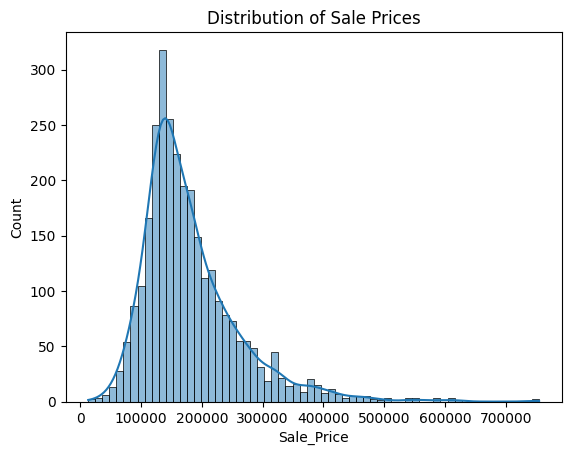

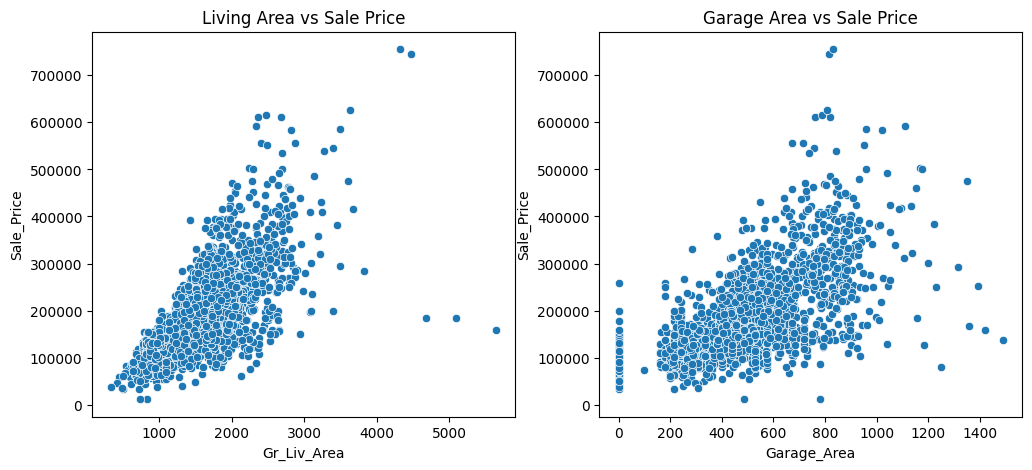

In [15]:
# Visualising data
# Histogram of the Sale_Price column

# It counts how many houses fall into different price ranges (bins) and displays that as bars.
sns.histplot(df['Sale_Price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Creates a new figure with a size of 12 units wide by 5 units tall.
plt.figure(figsize=(12, 5))
# Sets the canvas for plotting multiple subplots.
# Sets up the first subplot in a 1 row, 2 columns layout.
plt.subplot(1, 2, 1)

# Draws a scatter plot with: X-axis: 'Gr_Liv_Area' (living area in square feet), Y-axis: 'Sale_Price' (house sale price)
# Shows how sale price varies with living area.
sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=df)
plt.title('Living Area vs Sale Price')

# Sets up the first subplot in a 2 rows, 2 columns layout.
plt.subplot(1, 2, 2)

# Draws another scatter plot: X-axis: 'Garage_Area' (garage size in square feet), Y-axis: 'Sale_Price'
#Shows how sale price varies with garage area.
sns.scatterplot(x='Garage_Area', y='Sale_Price', data=df)
plt.title('Garage Area vs Sale Price')
plt.show()

In [16]:
# Check for missing values
print(df[['Gr_Liv_Area', 'Garage_Area', 'Sale_Price']].isnull().sum())

# Remove duplicates (if any)
df = df.drop_duplicates()

# Handle outliers (example using Interquartile Range (Spread of data),IQR, for Gr_Liv_Area)

# Calculates the first quartile (Q1), first 25% of the data falls
Q1 = df['Gr_Liv_Area'].quantile(0.25)

# Calculates the third quartile (Q3) the value below which 75% of the data falls
Q3 = df['Gr_Liv_Area'].quantile(0.75)

# Interquartile Range (IQR) is the range of the middle 50% of values- identify outliers.
IQR = Q3 - Q1

# filters the DataFrame df to exclude rows where Gr_Liv_Area is considered an outlier.
# Outliers are defined as values:
	# Below Q1 - 1.5 * IQR, or
	# Above Q3 + 1.5 * IQR

# Keeping only the non-outlier rows
df = df[~((df['Gr_Liv_Area'] < (Q1 - 1.5 * IQR)) | (df['Gr_Liv_Area'] > (Q3 + 1.5 * IQR)))]

Gr_Liv_Area    0
Garage_Area    0
Sale_Price     0
dtype: int64


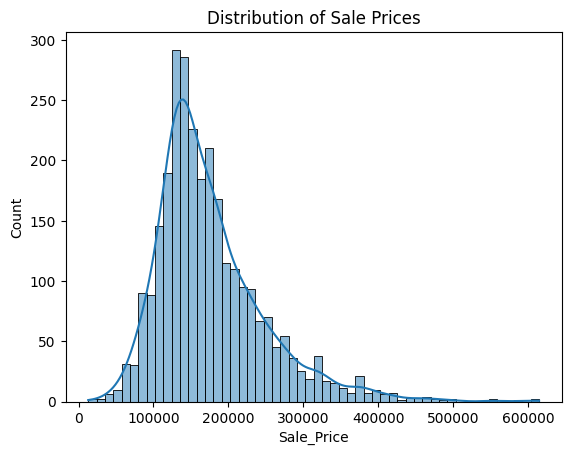

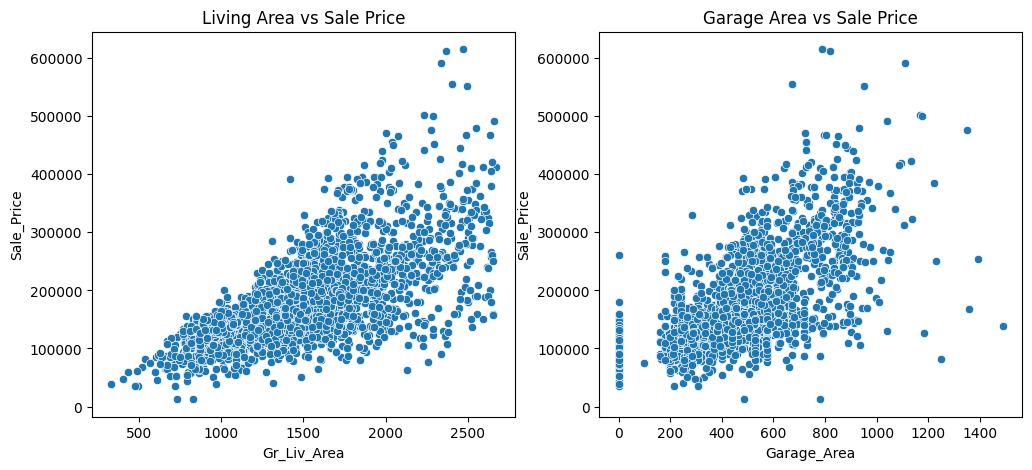

In [17]:
# Visualising data after correction for outlier

# Histogram of the Sale_Price column
# It counts how many houses fall into different price ranges (bins) and displays that as bars.
sns.histplot(df['Sale_Price'], kde=True)
plt.title('Distribution of Sale Prices')
plt.show()

# Creates a new figure with a size of 12 units wide by 5 units tall.
plt.figure(figsize=(12, 5))
# Sets the canvas for plotting multiple subplots.
# Sets up the first subplot in a 1 row, 2 columns layout.
plt.subplot(1, 2, 1)

# Draws a scatter plot with: X-axis: 'Gr_Liv_Area' (living area in square feet), Y-axis: 'Sale_Price' (house sale price)
# Shows how sale price varies with living area.
sns.scatterplot(x='Gr_Liv_Area', y='Sale_Price', data=df)
plt.title('Living Area vs Sale Price')

# Sets up the first subplot in a 2 rows, 2 columns layout.
plt.subplot(1, 2, 2)

# Draws another scatter plot: X-axis: 'Garage_Area' (garage size in square feet), Y-axis: 'Sale_Price'
#Shows how sale price varies with garage area.
sns.scatterplot(x='Garage_Area', y='Sale_Price', data=df)
plt.title('Garage Area vs Sale Price')
plt.show()


#### Distribution of Sale Prices: The histogram showed that house sale prices are righ-skewed, indicating a small number of high-priced homes.

#### Relationships with Features:
#### Gr_Liv_Area vs Sale_Price: A strong positive correlation was observed. As living area increases, sale price tends to increase.
#### Garage_Area vs Sale_Price: Also showed a positive relationship, but not as strong or consistent as living area.

In [18]:
# Define Independent variable and dependent varaiable
X = df[['Gr_Liv_Area', 'Garage_Area']]
y = df['Sale_Price']

# Split data into training and test sets (75:25)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [19]:
# Initialize and train the model
model = LinearRegression()
model.fit(X_train, y_train)

# Print coefficients and intercept
print(f"Intercept: {model.intercept_:.2f}")
print(f"Coefficient for Gr_Liv_Area: {model.coef_[0]:.2f}")
print(f"Coefficient for Garage_Area: {model.coef_[1]:.2f}")

Intercept: -8759.61
Coefficient for Gr_Liv_Area: 81.74
Coefficient for Garage_Area: 138.90


Root Mean Squared Error (RMSE): $47095.83


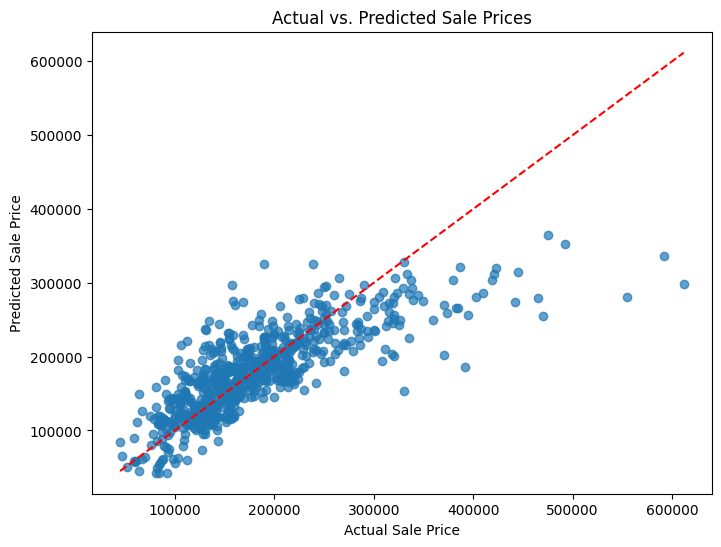

In [21]:
# Predict on test set
y_pred = model.predict(X_test)

# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Root Mean Squared Error (RMSE): ${rmse:.2f}")

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual Sale Price")
plt.ylabel("Predicted Sale Price")
plt.title("Actual vs. Predicted Sale Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()

#### On average, the model’s predictions deviate from the actual sale price by about $47k.

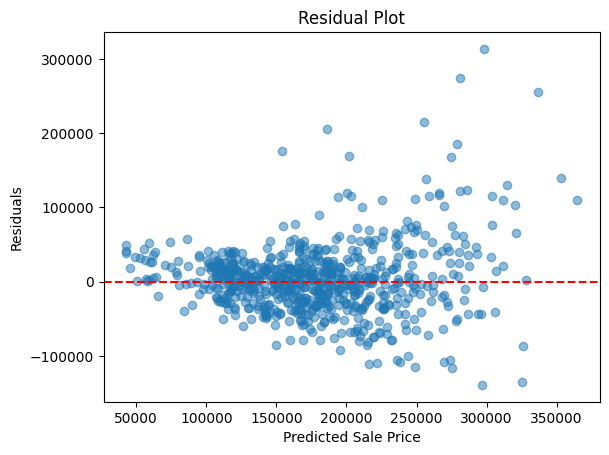

In [22]:
# Residual plot
# Calculates the residuals, which are the differences between actual and predicted values:
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Sale Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

#### The graph above shows that there was no bias in our model. Most data are scattered about the 0 line
#### Gr_Liv_Area is a much stronger predictor of sale price than Garage_Area.

In [48]:
# Possible Improvement to the model

features = ['Gr_Liv_Area', 'Garage_Area', 'Year_Built', 'Total_Bsmt_SF', 'Full_Bath', 'Bedroom_AbvGr', 'Kitchen_AbvGr']
X = df[features]
y = df['Sale_Price']


In [49]:
#Reduce skew by applying a log transformation to Sale_Price.
y_log = np.log1p(1+y)  # log(1 + y) handles zeros better

X_train, X_test, y_train_log, y_test_log = train_test_split(X, y_log, test_size=0.25, random_state=42)

In [52]:
model = LinearRegression()
model.fit(X_train, y_train_log)

y_pred_log = model.predict(X_test)

# Convert predictions back to original scale
y_pred = np.expm1(y_pred_log)
y_actual = np.expm1(y_test_log)

# Evaluate RMSE
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
print(f"RMSE: {rmse:.2f}")

RMSE: 29808.81


#### Good improvement on previous model. 
##### This model on average, the model’s predictions deviate from the actual sale price only by about $29k.